In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix ,classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve,auc,roc_auc_score
from six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
import pydot
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_predict
from sklearn import model_selection

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [17]:
at=pd.read_csv(r"c:\Users\Akanksha\Documents\Attrition.csv")
at

Age Attrition     BusinessTravel  DailyRate              Department  \
0      41       Yes      Travel_Rarely       1102                   Sales   
1      49        No  Travel_Frequently        279  Research & Development   
2      37       Yes      Travel_Rarely       1373  Research & Development   
3      33        No  Travel_Frequently       1392  Research & Development   
4      27        No      Travel_Rarely        591  Research & Development   
...   ...       ...                ...        ...                     ...   
1465   36        No  Travel_Frequently        884  Research & Development   
1466   39        No      Travel_Rarely        613  Research & Development   
1467   27        No      Travel_Rarely        155  Research & Development   
1468   49        No  Travel_Frequently       1023                   Sales   
1469   34        No      Travel_Rarely        628  Research & Development   

      DistanceFromHome  Education EducationField  EmployeeCount  \
0                    1          2  Life Sciences              1   
1                    8          1  Life Sciences              1   
2                    2          2          Other              1   
3                    3          4  Life Sciences              1   
4                    2          1        Medical              1   
...                ...        ...            ...            ...   
1465                23          2        Medical              1   
1466                 6          1        Medical              1   
1467                 4          3  Life Sciences              1   
1468                 2          3        Medical              1   
1469                 8          3        Medical              1   

      EmployeeNumber  ...  RelationshipSatisfaction StandardHours  \
0                  1  ...                         1            80   
1                  2  ...                         4            80   
2                  4  ...                         2            80   
3                  5  ...                         3            80   
4                  7  ...                         4            80   
...              ...  ...                       ...           ...   
1465            2061  ...                         3            80   
1466            2062  ...                         1            80   
1467            2064  ...                         2            80   
1468            2065  ...                         4            80   
1469            2068  ...                         1            80   

      StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0                    0                  8                      0   
1                    1                 10                      3   
2                    0                  7                      3   
3                    0                  8                      3   
4                    1                  6                      3   
...                ...                ...                    ...   
1465                 1                 17                      3   
1466                 1                  9                      5   
1467                 1                  6                      0   
1468                 0                 17                      3   
1469                 0                  6                      3   

     WorkLifeBalance  YearsAtCompany YearsInCurrentRole  \
0                  1               6                  4   
1                  3              10                  7   
2                  3               0                  0   
3                  3               8                  7   
4                  3               2                  2   
...              ...             ...                ...   
1465               3               5                  2   
1466               3               7                  7   
1467               3               6                  2   
1468               2               9    

In [18]:
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

In [19]:
at

Age Attrition     BusinessTravel  DailyRate              Department  \
0      41       Yes      Travel_Rarely       1102                   Sales   
1      49        No  Travel_Frequently        279  Research & Development   
2      37       Yes      Travel_Rarely       1373  Research & Development   
3      33        No  Travel_Frequently       1392  Research & Development   
4      27        No      Travel_Rarely        591  Research & Development   
5      32        No  Travel_Frequently       1005  Research & Development   
6      59        No      Travel_Rarely       1324  Research & Development   
7      30        No      Travel_Rarely       1358  Research & Development   
8      38        No  Travel_Frequently        216  Research & Development   
9      36        No      Travel_Rarely       1299  Research & Development   
10     35        No      Travel_Rarely        809  Research & Development   
11     29        No      Travel_Rarely        153  Research & Development   
12     31        No      Travel_Rarely        670  Research & Development   
13     34        No      Travel_Rarely       1346  Research & Development   
14     28       Yes      Travel_Rarely        103  Research & Development   
15     29        No      Travel_Rarely       1389  Research & Development   
16     32        No      Travel_Rarely        334  Research & Development   
17     22        No         Non-Travel       1123  Research & Development   
18     53        No      Travel_Rarely       1219                   Sales   
19     38        No      Travel_Rarely        371  Research & Development   
20     24        No         Non-Travel        673  Research & Development   
21     36       Yes      Travel_Rarely       1218                   Sales   
22     34        No      Travel_Rarely        419  Research & Development   
23     21        No      Travel_Rarely        391  Research & Development   
24     34       Yes      Travel_Rarely        699  Research & Development   
25     53        No      Travel_Rarely       1282  Research & Development   
26     32       Yes  Travel_Frequently       1125  Research & Development   
27     42        No      Travel_Rarely        691                   Sales   
28     44        No      Travel_Rarely        477  Research & Development   
29     46        No      Travel_Rarely        705                   Sales   
30     33        No      Travel_Rarely        924  Research & Development   
31     44        No      Travel_Rarely       1459  Research & Development   
32     30        No      Travel_Rarely        125  Research & Development   
33     39       Yes      Travel_Rarely        895                   Sales   
34     24       Yes      Travel_Rarely        813  Research & Development   
35     43        No      Travel_Rarely       1273  Research & Development   
36     50       Yes      Travel_Rarely        869                   Sales   
37     35        No      Travel_Rarely        890                   Sales   
38     36        No      Travel_Rarely        852  Research & Development   
39     33        No  Travel_Frequently       1141                   Sales   
40     35        No      Travel_Rarely        464  Research & Development   
41     27        No      Travel_Rarely       1240  Research & Development   
42     26       Yes      Travel_Rarely       1357  Research & Development   
43     27        No  Travel_Frequently        994                   Sales   
44     30        No  Travel_Frequently        721  Research & Development   
45     41       Yes      Travel_Rarely       1360  Research & Development   
46     34        No         Non-Travel       1065                   Sales   
47     37        No      Travel_Rarely        408  Research & Development   
48     46        No  Travel_Frequently       1211                   Sales   
49     35        No      Travel_Rarely       1229  Research & Development   
50     48       Yes      Travel_Rarely        626  Research & Development   
51

In [20]:
at.describe()

Age    DailyRate  DistanceFromHome    Education  EmployeeCount  \
count  1470.000000  1470.000000       1470.000000  1470.000000         1470.0   
mean     36.923810   802.485714          9.192517     2.912925            1.0   
std       9.135373   403.509100          8.106864     1.024165            0.0   
min      18.000000   102.000000          1.000000     1.000000            1.0   
25%      30.000000   465.000000          2.000000     2.000000            1.0   
50%      36.000000   802.000000          7.000000     3.000000            1.0   
75%      43.000000  1157.000000         14.000000     4.000000            1.0   
max      60.000000  1499.000000         29.000000     5.000000            1.0   

       EmployeeNumber  EnvironmentSatisfaction   HourlyRate  JobInvolvement  \
count     1470.000000              1470.000000  1470.000000     1470.000000   
mean      1024.865306                 2.721769    65.891156        2.729932   
std        602.024335                 1.093082    20.329428        0.711561   
min          1.000000                 1.000000    30.000000        1.000000   
25%        491.250000                 2.000000    48.000000        2.000000   
50%       1020.500000                 3.000000    66.000000        3.000000   
75%       1555.750000                 4.000000    83.750000        3.000000   
max       2068.000000                 4.000000   100.000000        4.000000   

          JobLevel  JobSatisfaction  MonthlyIncome   MonthlyRate  \
count  1470.000000      1470.000000    1470.000000   1470.000000   
mean      2.063946         2.728571    6502.931293  14313.103401   
std       1.106940         1.102846    4707.956783   7117.786044   
min       1.000000         1.000000    1009.000000   2094.000000   
25%       1.000000         2.000000    2911.000000   8047.000000   
50%       2.000000         3.000000    4919.000000  14235.500000   
75%       3.000000         4.000000    8379.000000  20461.500000   
max       5.000000         4.000000   19999.000000  26999.000000   

       NumCompaniesWorked  PercentSalaryHike  PerformanceRating  \
count         1470.000000        1470.000000        1470.000000   
mean             2.693197          15.209524           3.153741   
std              2.498009           3.659938           0.360824   
min              0.000000          11.000000           3.000000   
25%              1.000000          12.000000           3.000000   
50%              2.000000          14.000000           3.000000   
75%              4.000000          18.000000           3.000000   
max              9.000000          25.000000           4.000000   

       RelationshipSatisfaction  StandardHours  StockOptionLevel  \
count               1470.000000         1470.0       1470.000000   
mean                   2.712245           80.0          0.793878   
std                    1.081209            0.0          0.852077   
min                    1.000000           80.0          0.000000   
25%                    2.000000           80.0          0.000000   
50%                    3.000000           80.0          1.000000   
75%                    4.000000           80.0          1.000000   
max                    4.000000           80.0          3.000000   

       TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  \
count        1470.000000            1470.000000      1470.000000   
mean           11.279592               2.799320         2.761224   
std             7.780782               1.289271         0.706476   
min             0.000000               0.000000         1.000000   
25%             6.000000               2.000000         2.000000   
50%            10.000000               3.000000         3.000000   
75%            15.000000               3.000000         3.000000   
max            40.000000               6.000000         4.000000   

       YearsAtCompany  YearsInCurrentRole  YearsSinceLastPromotion  \
count     1470.000000         1470.000000              1470.

In [21]:
at.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [22]:
at.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

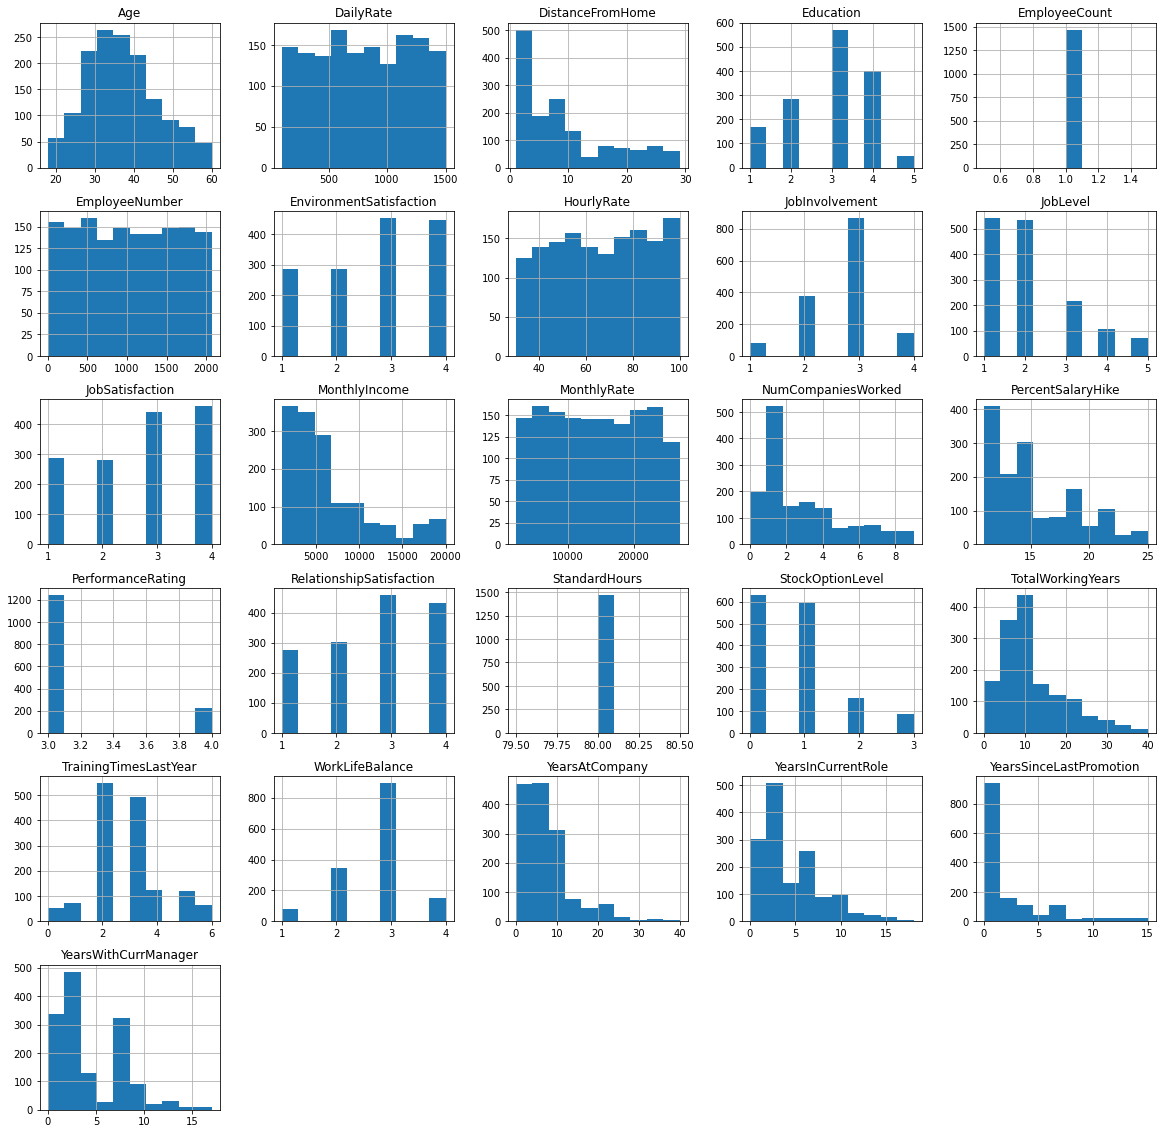

In [23]:
at.hist(figsize=(20,20))
plt.show()

No     1233
Yes     237
Name: Attrition, dtype: int64


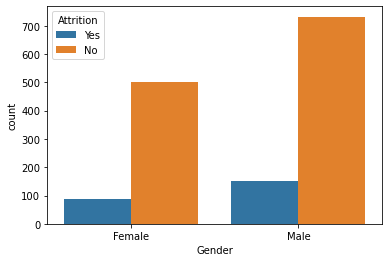

In [24]:
print(at['Attrition'].value_counts())

sns.countplot('Gender', hue='Attrition', data=at)

0    631
1    596
2    158
3     85
Name: StockOptionLevel, dtype: int64


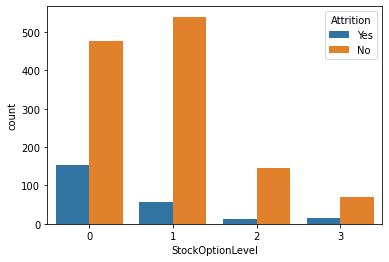

In [25]:
print(at['StockOptionLevel'].value_counts())
sns.countplot('StockOptionLevel', hue='Attrition', data=at)

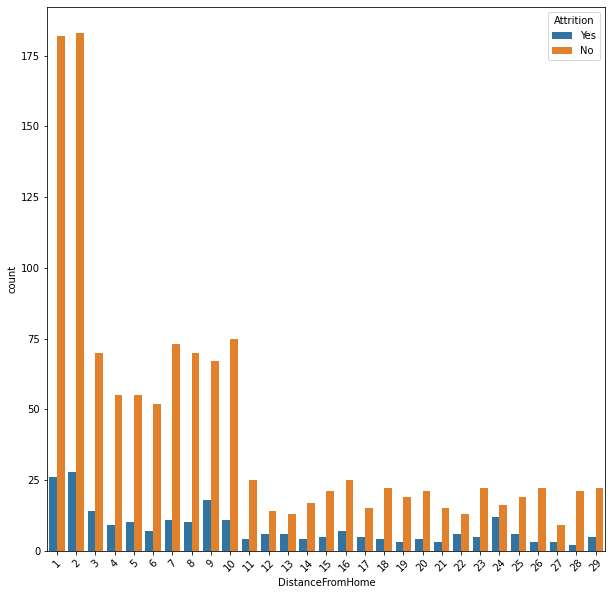

In [26]:
plt.figure(figsize=(10,10))
sns.countplot('DistanceFromHome', hue='Attrition', data=at)
plt.xticks(rotation=45)
plt.show()

0     581
1     357
2     159
7      76
4      61
3      52
5      45
6      32
11     24
8      18
9      17
15     13
13     10
12     10
14      9
10      6
Name: YearsSinceLastPromotion, dtype: int64


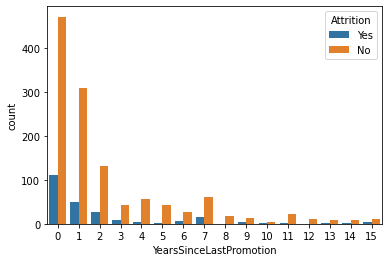

In [27]:
print(at['YearsSinceLastPromotion'].value_counts())

sns.countplot(x= "YearsSinceLastPromotion",  hue = "Attrition",data = at)

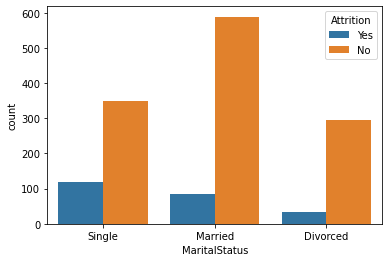

In [28]:
sns.countplot('MaritalStatus', hue='Attrition', data=at)

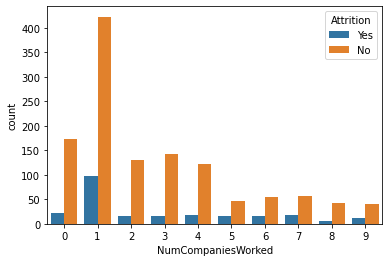

In [29]:
sns.countplot('NumCompaniesWorked', hue='Attrition', data=at)

In [30]:
at.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [31]:
at.shape

(1470, 35)

In [32]:
at.describe(include="all")

Age Attrition BusinessTravel    DailyRate  \
count   1470.000000      1470           1470  1470.000000   
unique          NaN         2              3          NaN   
top             NaN        No  Travel_Rarely          NaN   
freq            NaN      1233           1043          NaN   
mean      36.923810       NaN            NaN   802.485714   
std        9.135373       NaN            NaN   403.509100   
min       18.000000       NaN            NaN   102.000000   
25%       30.000000       NaN            NaN   465.000000   
50%       36.000000       NaN            NaN   802.000000   
75%       43.000000       NaN            NaN  1157.000000   
max       60.000000       NaN            NaN  1499.000000   

                    Department  DistanceFromHome    Education EducationField  \
count                     1470       1470.000000  1470.000000           1470   
unique                       3               NaN          NaN              6   
top     Research & Development               NaN          NaN  Life Sciences   
freq                       961               NaN          NaN            606   
mean                       NaN          9.192517     2.912925            NaN   
std                        NaN          8.106864     1.024165            NaN   
min                        NaN          1.000000     1.000000            NaN   
25%                        NaN          2.000000     2.000000            NaN   
50%                        NaN          7.000000     3.000000            NaN   
75%                        NaN         14.000000     4.000000            NaN   
max                        NaN         29.000000     5.000000            NaN   

        EmployeeCount  EmployeeNumber  EnvironmentSatisfaction Gender  \
count          1470.0     1470.000000              1470.000000   1470   
unique            NaN             NaN                      NaN      2   
top               NaN             NaN                      NaN   Male   
freq              NaN             NaN                      NaN    882   
mean              1.0     1024.865306                 2.721769    NaN   
std               0.0      602.024335                 1.093082    NaN   
min               1.0        1.000000                 1.000000    NaN   
25%               1.0      491.250000                 2.000000    NaN   
50%               1.0     1020.500000                 3.000000    NaN   
75%               1.0     1555.750000                 4.000000    NaN   
max               1.0     2068.000000                 4.000000    NaN   

         HourlyRate  JobInvolvement     JobLevel          JobRole  \
count   1470.000000     1470.000000  1470.000000             1470   
unique          NaN             NaN          NaN                9   
top             NaN             NaN          NaN  Sales Executive   
freq            NaN             NaN          NaN              326   
mean      65.891156        2.729932     2.063946              NaN   
std       20.329428        0.711561     1.106940              NaN   
min       30.000000        1.000000     1.000000              NaN   
25%       48.000000        2.000000     1.000000              NaN   
50%       66.000000        3.000000     2.000000              NaN   
75%       83.750000        3.000000     3.000000              NaN   
max      100.000000        4.000000     5.000000              NaN   

        JobSatisfaction MaritalStatus  MonthlyIncome   MonthlyRate  \
count       1470.000000          1470    1470.000000   1470.000000   
unique              NaN             3            NaN           NaN   
top                 NaN       Married            NaN           NaN   
freq                NaN           673            NaN           NaN   
mean           2.728571           NaN    6502.931293  14313.103401   
std            1.102846           NaN    4707.956783   7117.786044   
min            1.000000           NaN    1009.000000   2094.000000   
25%            2.000000           NaN    2911.000000   8

In [33]:
at=at.drop(["EmployeeCount"],axis=1)
at=at.drop(["Over18"],axis=1)
at=at.drop(["StandardHours"],axis=1)
at=at.drop(['EmployeeNumber'],axis=1)

In [34]:
at.shape

(1470, 31)

In [35]:
at.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EnvironmentSatisfaction  \
0                 1          2  Life Sciences                        2   
1                 8          1  Life Sciences                        3   
2                 2          2          Other                        4   
3                 3          4  Life Sciences                        4   
4                 2          1        Medical                        1   

   Gender  HourlyRate  JobInvolvement  JobLevel                JobRole  \
0  Female          94               3         2        Sales Executive   
1    Male          61               2         2     Research Scientist   
2    Male          92               2         1  Laboratory Technician   
3  Female          56               3         1     Research Scientist   
4    Male          40               3         1  Laboratory Technician   

   JobSatisfaction MaritalStatus  MonthlyIncome  MonthlyRate  \
0                4        Single           5993        19479   
1                2       Married           5130        24907   
2                3        Single           2090         2396   
3                3       Married           2909        23159   
4                2       Married           3468        16632   

   NumCompaniesWorked OverTime  PercentSalaryHike  PerformanceRating  \
0                   8      Yes                 11                  3   
1                   1       No                 23                  4   
2                   6      Yes                 15                  3   
3                   1      Yes                 11                  3   
4                   9       No                 12                  3   

   RelationshipSatisfaction  StockOptionLevel  TotalWorkingYears  \
0                         1                 0                  8   
1                         4                 1                 10   
2                         2                 0                  7   
3                         3                 0                  8   
4                         4                 1                  6   

   TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0                      0                1               6                   4   
1                      3                3              10                   7   
2                      3                3               0                   0   
3                      3                3               8                   7   
4                      3                3               2                   2   

   YearsSinceLastPromotion  YearsWithCurrManager  
0                        0                     5  
1                        1                     7  
2                        0                     0  
3                        3                     0  
4                        2                     2

In [36]:
at.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EnvironmentSatisfaction  \
0                 1          2  Life Sciences                        2   
1                 8          1  Life Sciences                        3   
2                 2          2          Other                        4   
3                 3          4  Life Sciences                        4   
4                 2          1        Medical                        1   

   Gender  HourlyRate  JobInvolvement  JobLevel                JobRole  \
0  Female          94               3         2        Sales Executive   
1    Male          61               2         2     Research Scientist   
2    Male          92               2         1  Laboratory Technician   
3  Female          56               3         1     Research Scientist   
4    Male          40               3         1  Laboratory Technician   

   JobSatisfaction MaritalStatus  MonthlyIncome  MonthlyRate  \
0                4        Single           5993        19479   
1                2       Married           5130        24907   
2                3        Single           2090         2396   
3                3       Married           2909        23159   
4                2       Married           3468        16632   

   NumCompaniesWorked OverTime  PercentSalaryHike  PerformanceRating  \
0                   8      Yes                 11                  3   
1                   1       No                 23                  4   
2                   6      Yes                 15                  3   
3                   1      Yes                 11                  3   
4                   9       No                 12                  3   

   RelationshipSatisfaction  StockOptionLevel  TotalWorkingYears  \
0                         1                 0                  8   
1                         4                 1                 10   
2                         2                 0                  7   
3                         3                 0                  8   
4                         4                 1                  6   

   TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0                      0                1               6                   4   
1                      3                3              10                   7   
2                      3                3               0                   0   
3                      3                3               8                   7   
4                      3                3               2                   2   

   YearsSinceLastPromotion  YearsWithCurrManager  
0                        0                     5  
1                        1                     7  
2                        0                     0  
3                        3                     0  
4                        2                     2

In [37]:
at['Target'] = at['Attrition'].apply(
    lambda x: 0 if x == 'No' else 1)

In [38]:
at=at.drop(['Attrition'],axis=1)

In [39]:
at

Age     BusinessTravel  DailyRate              Department  \
0      41      Travel_Rarely       1102                   Sales   
1      49  Travel_Frequently        279  Research & Development   
2      37      Travel_Rarely       1373  Research & Development   
3      33  Travel_Frequently       1392  Research & Development   
4      27      Travel_Rarely        591  Research & Development   
5      32  Travel_Frequently       1005  Research & Development   
6      59      Travel_Rarely       1324  Research & Development   
7      30      Travel_Rarely       1358  Research & Development   
8      38  Travel_Frequently        216  Research & Development   
9      36      Travel_Rarely       1299  Research & Development   
10     35      Travel_Rarely        809  Research & Development   
11     29      Travel_Rarely        153  Research & Development   
12     31      Travel_Rarely        670  Research & Development   
13     34      Travel_Rarely       1346  Research & Development   
14     28      Travel_Rarely        103  Research & Development   
15     29      Travel_Rarely       1389  Research & Development   
16     32      Travel_Rarely        334  Research & Development   
17     22         Non-Travel       1123  Research & Development   
18     53      Travel_Rarely       1219                   Sales   
19     38      Travel_Rarely        371  Research & Development   
20     24         Non-Travel        673  Research & Development   
21     36      Travel_Rarely       1218                   Sales   
22     34      Travel_Rarely        419  Research & Development   
23     21      Travel_Rarely        391  Research & Development   
24     34      Travel_Rarely        699  Research & Development   
25     53      Travel_Rarely       1282  Research & Development   
26     32  Travel_Frequently       1125  Research & Development   
27     42      Travel_Rarely        691                   Sales   
28     44      Travel_Rarely        477  Research & Development   
29     46      Travel_Rarely        705                   Sales   
30     33      Travel_Rarely        924  Research & Development   
31     44      Travel_Rarely       1459  Research & Development   
32     30      Travel_Rarely        125  Research & Development   
33     39      Travel_Rarely        895                   Sales   
34     24      Travel_Rarely        813  Research & Development   
35     43      Travel_Rarely       1273  Research & Development   
36     50      Travel_Rarely        869                   Sales   
37     35      Travel_Rarely        890                   Sales   
38     36      Travel_Rarely        852  Research & Development   
39     33  Travel_Frequently       1141                   Sales   
40     35      Travel_Rarely        464  Research & Development   
41     27      Travel_Rarely       1240  Research & Development   
42     26      Travel_Rarely       1357  Research & Development   
43     27  Travel_Frequently        994                   Sales   
44     30  Travel_Frequently        721  Research & Development   
45     41      Travel_Rarely       1360  Research & Development   
46     34         Non-Travel       1065                   Sales   
47     37      Travel_Rarely        408  Research & Development   
48     46  Travel_Frequently       1211                   Sales   
49     35      Travel_Rarely       1229  Research & Development   
50     48      Travel_Rarely        626  Research & Development   
51     28      Travel_Rarely       1434  Research & Development   
52     44      Travel_Rarely       1488                   Sales   
53     35         Non-Travel       1097  Research & Development   
54     26      Travel_Rarely       1443                   Sales   
55     33  Travel_Frequently        515  Research & Development   
56     35  Travel_Frequently        853                   Sales   
57     35      Travel_Rarely       1142  Research & Development   
58     31      Travel_Rarely        655  Research & D

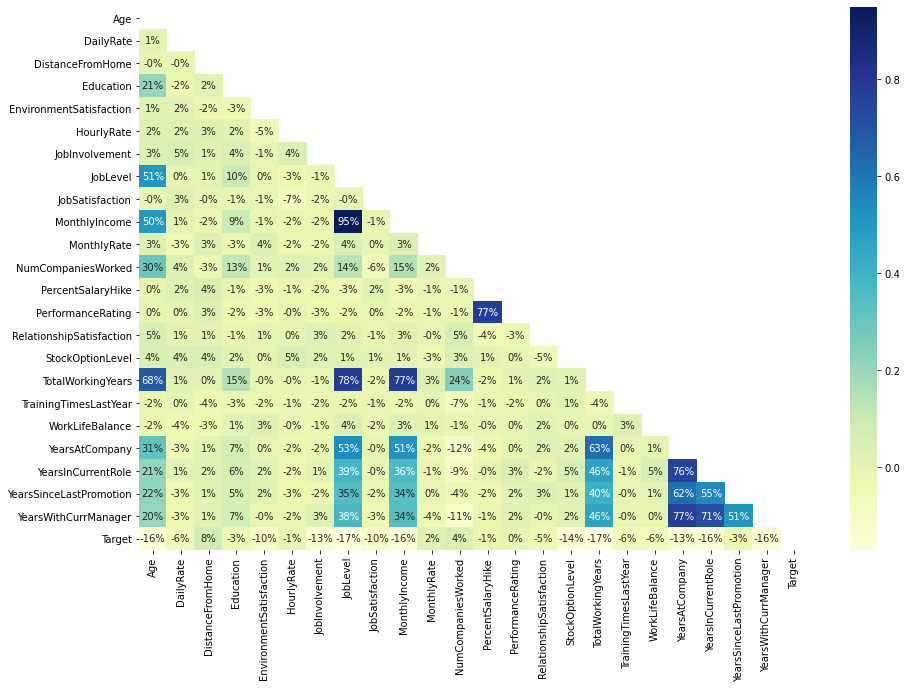

In [40]:
plt.figure(figsize=(15,10))
mask = np.triu(np.ones_like(at.corr()))
dataplot = sns.heatmap(at.corr(), mask=mask, annot=True, fmt='.0%', cmap="YlGnBu") 
plt.show()

In [41]:
corr=at[at.columns[1:]].corr()['Target'][:].sort_values()
print('Most Positive Correlaions: \n',corr.tail(5))
print('\nMost Negativs Correlations:\n',corr.head(5))

Most Positive Correlaions: 
 PerformanceRating     0.002889
MonthlyRate           0.015170
NumCompaniesWorked    0.043494
DistanceFromHome      0.077924
Target                1.000000
Name: Target, dtype: float64

Most Negativs Correlations:
 TotalWorkingYears      -0.171063
JobLevel               -0.169105
YearsInCurrentRole     -0.160545
MonthlyIncome          -0.159840
YearsWithCurrManager   -0.156199
Name: Target, dtype: float64


In [23]:
at.shape

(1470, 31)

In [24]:
for column in at.columns:
        if at[column].dtype == np.number:
            continue
        at[column] = LabelEncoder().fit_transform(at[column])

In [25]:
x=at.iloc[:,0:30]
y=at.iloc[:,-1]


In [26]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.2,random_state=101)

In [27]:
print(x_train.shape)
print(y_train.shape)
print("--------------")
print(x_test.shape)
print(y_test.shape)

(1176, 30)
(1176,)
--------------
(294, 30)
(294,)


In [28]:
log_reg=LogisticRegression(class_weight='balanced')

In [29]:
log_reg.fit(x_train,y_train);

C:\Users\Akanksha\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [30]:
pred_test=log_reg.predict(x_test)
pred_test

array([0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0], dtype=int64)

In [31]:
cross_score=cross_val_score(log_reg,x_train,y_train,cv=7,scoring='accuracy')
cross_score
logpredictions = cross_val_predict(log_reg, x_train, y_train)

C:\Users\Akanksha\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Akanksha\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n

In [32]:
tab=confusion_matrix(pred_test,y_test)
print(tab)
print('classification report for Logistic Regression\n', classification_report(pred_test,y_test))

[[172  15]
 [ 77  30]]
classification report for Logistic Regression
               precision    recall  f1-score   support

           0       0.69      0.92      0.79       187
           1       0.67      0.28      0.39       107

    accuracy                           0.69       294
   macro avg       0.68      0.60      0.59       294
weighted avg       0.68      0.69      0.65       294



In [33]:
log_reg.predict_proba(x_test) #predictions through percentage

array([[0.76333645, 0.23666355],
       [0.43757098, 0.56242902],
       [0.82538004, 0.17461996],
       [0.42288208, 0.57711792],
       [0.96733119, 0.03266881],
       [0.81270199, 0.18729801],
       [0.39038504, 0.60961496],
       [0.71096163, 0.28903837],
       [0.50150817, 0.49849183],
       [0.93995044, 0.06004956],
       [0.70072656, 0.29927344],
       [0.28264912, 0.71735088],
       [0.70508547, 0.29491453],
       [0.57927499, 0.42072501],
       [0.26337502, 0.73662498],
       [0.72040285, 0.27959715],
       [0.81863053, 0.18136947],
       [0.57157571, 0.42842429],
       [0.57560709, 0.42439291],
       [0.69214173, 0.30785827],
       [0.54947155, 0.45052845],
       [0.70398564, 0.29601436],
       [0.44434896, 0.55565104],
       [0.28515064, 0.71484936],
       [0.82527284, 0.17472716],
       [0.60678494, 0.39321506],
       [0.64250915, 0.35749085],
       [0.6466016 , 0.3533984 ],
       [0.89727183, 0.10272817],
       [0.9120126 , 0.0879874 ],
       [0.

In [34]:
list(log_reg.coef_)

[array([-1.53435371e-02,  5.60222494e-02, -1.94834148e-04,  8.02897598e-02,
         5.14901375e-02,  2.71595151e-02,  9.45909442e-02, -1.75472652e-01,
        -3.15977504e-02,  5.71615151e-03, -1.80608044e-01, -2.45132418e-02,
         1.66915157e-02, -1.23917587e-01,  2.42503854e-01, -1.02959821e-03,
         5.56239077e-04,  2.30722143e-01,  2.48403410e-01, -1.52984327e-02,
         1.43784962e-02, -3.45705192e-03, -1.58777800e-01, -6.43080236e-02,
        -7.43891578e-02, -3.17961462e-02,  1.65970430e-01, -2.01565444e-01,
         2.03558875e-01, -1.78912434e-01])]

In [35]:
log_reg.intercept_

array([0.03510212])

In [36]:
cross_score=cross_val_score(log_reg,x_train,y_train,cv=10,scoring='accuracy')
LR_CV=cross_score.mean()

logpredictions = cross_val_predict(log_reg, x_train, y_train)
logpredictions

C:\Users\Akanksha\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Akanksha\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n

array([0, 1, 1, ..., 1, 0, 0], dtype=int64)

In [37]:
print('classification report for Logistic Regression with CV \n', classification_report(y_train,logpredictions ))

classification report for Logistic Regression with CV 
               precision    recall  f1-score   support

           0       0.93      0.69      0.79       984
           1       0.32      0.73      0.44       192

    accuracy                           0.70      1176
   macro avg       0.62      0.71      0.62      1176
weighted avg       0.83      0.70      0.74      1176



In [38]:
pred_test=log_reg.predict(x_test)

In [39]:
pred_test

array([0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0], dtype=int64)

In [40]:
roc_auc_score(pred_test,y_test)# area under the curve value

0.6000799640161927

In [41]:
pred_test_prob=log_reg.predict_proba(x_test)

In [42]:
fpr,tpr,thre=roc_curve(y_test,pred_test_prob[:,1])

In [43]:
dt=DecisionTreeClassifier(criterion="gini",max_depth=4,min_samples_split=30)

In [44]:
dt.fit(x_train,y_train);

In [45]:
pred_val=dt.predict(x_test)

In [46]:
pred_val

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [47]:
roc_auc_score(pred_val,y_test)

0.6834532374100719

In [48]:
pred_test_prob_dt=dt.predict_proba(x_test)

In [49]:
fpr_dt,tpr_dt,thre_dt=roc_curve(y_test,pred_test_prob_dt[:,1])

In [50]:
auc_dt=auc(fpr_dt,tpr_dt)

In [51]:
tab_DT=confusion_matrix(pred_val,y_test)
print(tab_DT)
print('classification report for Decision Tree\n', classification_report(pred_val,y_test))

[[241  37]
 [  8   8]]
classification report for Decision Tree
               precision    recall  f1-score   support

           0       0.97      0.87      0.91       278
           1       0.18      0.50      0.26        16

    accuracy                           0.85       294
   macro avg       0.57      0.68      0.59       294
weighted avg       0.92      0.85      0.88       294



In [52]:
cross_score=cross_val_score(dt,x_train,y_train,cv=7,scoring='accuracy')
DT_CV=cross_score.mean()
print(DT_CV)


dtpredictions = cross_val_predict(dt, x_train, y_train)

0.8350340136054422


In [53]:
print('classification report for Decision Tree with CV \n', classification_report(y_train,dtpredictions ))

classification report for Decision Tree with CV 
               precision    recall  f1-score   support

           0       0.87      0.95      0.91       984
           1       0.54      0.29      0.38       192

    accuracy                           0.84      1176
   macro avg       0.71      0.62      0.65      1176
weighted avg       0.82      0.84      0.82      1176



In [54]:
dt.feature_importances_

array([0.05862415, 0.        , 0.10951805, 0.        , 0.04974825,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.08894581, 0.        , 0.07444264, 0.        , 0.        ,
       0.23580859, 0.03669143, 0.03833775, 0.19518564, 0.        ,
       0.        , 0.        , 0.        , 0.09263515, 0.        ,
       0.        , 0.02006254, 0.        , 0.        , 0.        ])

In [55]:
feat_importance=pd.DataFrame({"Feature":x_train.columns,"Importance":dt.feature_importances_})

In [56]:
feat_importance.sort_values("Importance",ascending=False).head(15)

Feature  Importance
15            MonthlyIncome    0.235809
18                 OverTime    0.195186
2                 DailyRate    0.109518
23        TotalWorkingYears    0.092635
10           JobInvolvement    0.088946
12                  JobRole    0.074443
0                       Age    0.058624
4          DistanceFromHome    0.049748
17       NumCompaniesWorked    0.038338
16              MonthlyRate    0.036691
26           YearsAtCompany    0.020063
20        PerformanceRating    0.000000
28  YearsSinceLastPromotion    0.000000
27       YearsInCurrentRole    0.000000
25          WorkLifeBalance    0.000000

In [59]:
Feature=('MonthlyIncome','OverTime','DailyRate','TotalWorkingYears','JobInvolvement','JobRole','Age','DistanceFromHome','NumCompaniesWorked','MonthlyRate','YearsAtCompany','PerformanceRating','YearsSinceLastPromotion','YearsInCurrentRole','WorkLifeBalance')

In [60]:
values_feat=(0.235809,0.195186,0.109518,0.092635,0.088946,0.074443,0.058624,0.049748,0.038338,0.036691,0.020063,0.000000,0.000000,0.000000,0.000000)

<BarContainer object of 15 artists>

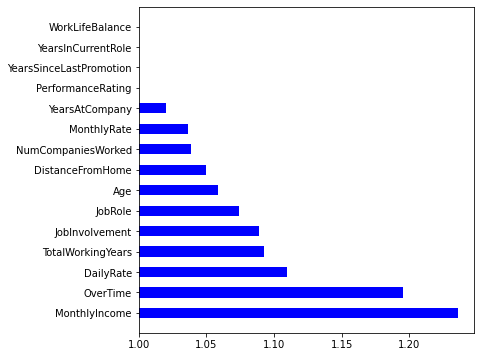

In [61]:
plt.figure(figsize=(6,6))
plt.barh(Feature,values_feat,height=0.5,left=True,color='b')

In [62]:
dot_data=StringIO()

In [63]:
export_graphviz(dt,out_file=dot_data,
              filled=True,rounded=True,
              special_characters=True,feature_names=x.columns)

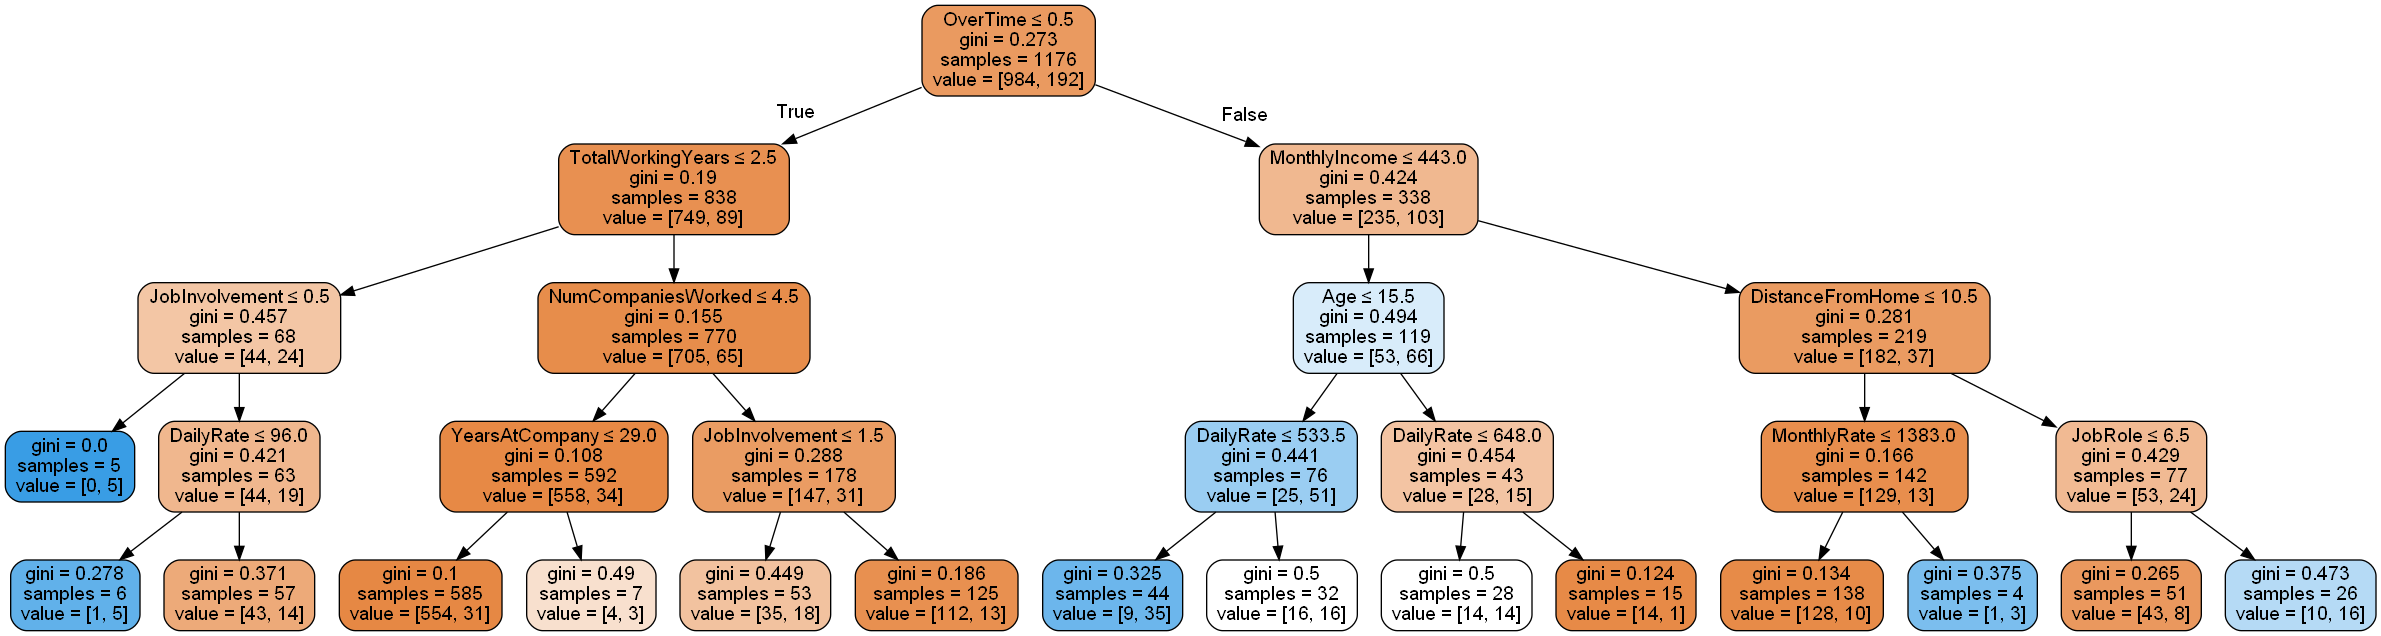

In [64]:
graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
(graph, )=pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [65]:
rf=RandomForestClassifier(n_estimators=50)

In [66]:
rf.fit(x_train,y_train)

RandomForestClassifier(n_estimators=50)

In [67]:
pred_rf=rf.predict(x_test)

In [68]:
pred_rf

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [69]:
roc_auc_score(pred_rf,y_test)

0.7874564459930314

In [70]:
pred_test_prob_rf=rf.predict_proba(x_test)

In [71]:
fpr_rf,tpr_rf,thre_rf=roc_curve(y_test,pred_test_prob_rf[:,1])

In [72]:
tab_RF=confusion_matrix(pred_rf,y_test)
print(tab_RF)
print('classification report for Random Forest Classifier \n', classification_report(pred_rf,y_test))

[[247  40]
 [  2   5]]
classification report for Random Forest Classifier 
               precision    recall  f1-score   support

           0       0.99      0.86      0.92       287
           1       0.11      0.71      0.19         7

    accuracy                           0.86       294
   macro avg       0.55      0.79      0.56       294
weighted avg       0.97      0.86      0.90       294



In [73]:
cross_score=cross_val_score(rf,x_train,y_train,cv=7,scoring='accuracy')
RF_CV=cross_score.mean()
print(RF_CV)

rfpredictions = cross_val_predict(rf, x_train, y_train)

0.854591836734694


In [74]:
print('classification report for Random Forest Classifier with CV \n', classification_report(y_train,rfpredictions ))

classification report for Random Forest Classifier with CV 
               precision    recall  f1-score   support

           0       0.86      0.99      0.92       984
           1       0.69      0.15      0.25       192

    accuracy                           0.85      1176
   macro avg       0.77      0.57      0.58      1176
weighted avg       0.83      0.85      0.81      1176



In [75]:
rf.feature_importances_

array([0.06480873, 0.01466176, 0.05766962, 0.0107096 , 0.04653316,
       0.01990032, 0.01939104, 0.03025548, 0.01082471, 0.04583511,
       0.0254973 , 0.0294207 , 0.026913  , 0.02792566, 0.02149184,
       0.07967898, 0.052423  , 0.03935015, 0.05391119, 0.03463936,
       0.0038134 , 0.01994399, 0.02693654, 0.05440869, 0.02532278,
       0.02463661, 0.04934568, 0.0319696 , 0.02425029, 0.02753171])

In [76]:
feat_importances=pd.DataFrame({"Feature":x_train.columns,"Importance":rf.feature_importances_})
feat_importances.sort_values("Importance",ascending=False).head(15)

Feature  Importance
15            MonthlyIncome    0.079679
0                       Age    0.064809
2                 DailyRate    0.057670
23        TotalWorkingYears    0.054409
18                 OverTime    0.053911
16              MonthlyRate    0.052423
26           YearsAtCompany    0.049346
4          DistanceFromHome    0.046533
9                HourlyRate    0.045835
17       NumCompaniesWorked    0.039350
19        PercentSalaryHike    0.034639
27       YearsInCurrentRole    0.031970
7   EnvironmentSatisfaction    0.030255
11                 JobLevel    0.029421
13          JobSatisfaction    0.027926

In [77]:
feature_rf=('MonthlyIncome','Age','DailyRate','DistanceFromHome','MonthlyRate','OverTime','TotalWorkingYears','HourlyRate','YearsAtCompany','NumCompaniesWorked','YearsWithCurrManager','PercentSalaryHike','EnvironmentSatisfaction','JobRole','YearsInCurrentRole')

values_rf=(0.071274,0.070113,0.056478,0.052369,0.050845,0.049360,0.048182,0.047579,0.045848,0.042419,0.035962,0.034699,0.029783,0.029476,0.028356)

<BarContainer object of 15 artists>

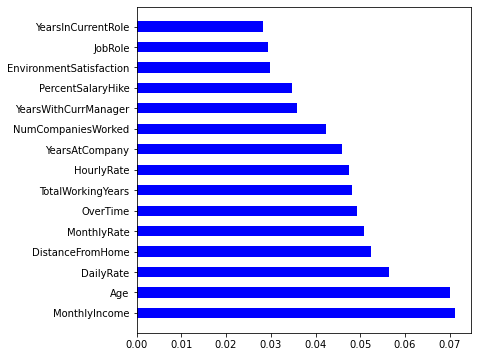

In [78]:
plt.figure(figsize=(6,6))
plt.barh(feature_rf,values_rf,height=0.5,color='b')

In [79]:
auc_lr=auc(fpr,tpr)
auc_dt=auc(fpr_dt,tpr_dt)
auc_rf=auc(fpr_rf,tpr_rf)

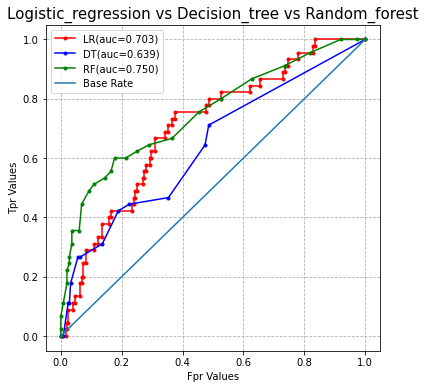

In [80]:
plt.figure(figsize=(6,6))
plt.plot(fpr,tpr,color="r",marker='.',label='LR(auc=%0.3f)' % auc_lr)
plt.plot(fpr_dt,tpr_dt,color="b",marker='.',label='DT(auc=%0.3f)' % auc_dt)
plt.plot(fpr_rf,tpr_rf,color="g",marker='.',label='RF(auc=%0.3f)' % auc_rf)
plt.grid(linestyle='--')
plt.xlabel('Fpr Values')
plt.ylabel('Tpr Values')
plt.title('Logistic_regression vs Decision_tree vs Random_forest',size=15)
plt.plot([0,1], [0,1],label='Base Rate')
plt.legend()

Text(0.5, 1.0, 'Number vs Square')

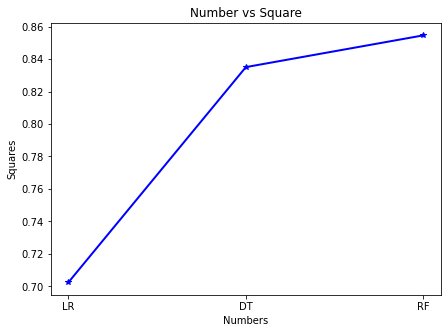

In [82]:
plt.figure(figsize = (7 , 5)) # should add this before creating the plot---> always pass this value before plotting plot
plt.plot(labels , data , color="blue" , marker="*" , linewidth=2)
plt.xlabel("Numbers")
plt.ylabel("Squares")
plt.title("Number vs Square") # name of plot
#plt.text(3,9,"16") # specifying numbers on line